In [47]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

# Q1 
### Using the code from the lesson as a guide and the REST API from https://swapi.dev/ as we did in the lesson, create a dataframe named people that has all of the data for people.


In [6]:
# list comprehension
payloads: list[list[dict]] = [
    requests.get(f"https://swapi.dev/api/people/?page={page_number}").json()["results"]
    for page_number in range(1, 10)
]

In [7]:
total = []
for payload in payloads:
    total += payload
len(total)

82

In [8]:
# creates a new variable and connection to the api 
response = requests.get('https://swapi.dev/api/people/')  


# creates a variable to hold the data 
data = response.json() 

# Initialize a DataFrame to store the results
people_df = pd.DataFrame(data['results'])

# Initialize variables to keep track of page
next_page = data['next']  # Set this to the initial value to start the loop

while next_page:
    # Make a request to the API using the current next_page URL
    response = requests.get(next_page)
    
    # Check status code 
    if response.status_code == 200:
        data = response.json()
        
        # get information 
        number_of_people = data['count']
        next_page = data['next']
        previous_page = data['previous']
        number_of_results = len(data['results'])
        max_page = math.ceil(number_of_people / number_of_results)
        
        # Concat the results to the DataFrame
        people_df = pd.concat([people_df, pd.DataFrame(data['results'])]).reset_index(drop=True)
        
        # Print information about the current page
        print(f'number_of_people: {number_of_people}')
        print(f'next_page: {next_page}')
        print(f'previous_page: {previous_page}')
        print(f'number_of_results: {number_of_results}')
        print(f'max_page: {max_page}')
    else:
        # Handle the case where the request was not successful (e.g., handle errors)
        print(f"Request failed with status code {response.status_code}")
        break  # Exit the loop if there's an issue with the request

number_of_people: 82
next_page: https://swapi.dev/api/people/?page=3
previous_page: https://swapi.dev/api/people/?page=1
number_of_results: 10
max_page: 9
number_of_people: 82
next_page: https://swapi.dev/api/people/?page=4
previous_page: https://swapi.dev/api/people/?page=2
number_of_results: 10
max_page: 9
number_of_people: 82
next_page: https://swapi.dev/api/people/?page=5
previous_page: https://swapi.dev/api/people/?page=3
number_of_results: 10
max_page: 9
number_of_people: 82
next_page: https://swapi.dev/api/people/?page=6
previous_page: https://swapi.dev/api/people/?page=4
number_of_results: 10
max_page: 9
number_of_people: 82
next_page: https://swapi.dev/api/people/?page=7
previous_page: https://swapi.dev/api/people/?page=5
number_of_results: 10
max_page: 9
number_of_people: 82
next_page: https://swapi.dev/api/people/?page=8
previous_page: https://swapi.dev/api/people/?page=6
number_of_results: 10
max_page: 9
number_of_people: 82
next_page: https://swapi.dev/api/people/?page=9
p

In [9]:
people_df.shape

(82, 16)

In [10]:
people_df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[https://swapi.dev/api/starships/13/],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/30/],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/


In [11]:
def get_people(response = requests.get('https://swapi.dev/api/people/')) -> pd.DataFrame:
    data = response.json() 
    people_df = pd.DataFrame(data['results'])
    next_page = data['next'] 

    while next_page:
        # Make a request to the API using the current next_page URL
        response = requests.get(next_page)
    
        # Check status code 
        if response.status_code == 200:
            data = response.json()
        
            # get information 
            number_of_people = data['count']
            next_page = data['next']
            previous_page = data['previous']
            number_of_results = len(data['results'])
            max_page = math.ceil(number_of_people / number_of_results)
        
            # Concat the results to the DataFrame
            people_df = pd.concat([people_df, pd.DataFrame(data['results'])]).reset_index(drop=True)
        
            # Print information about the current page
            print(f'{number_of_people=}')
            print(f'next_page: {next_page}')
            print(f'previous_page: {previous_page}')
            print(f'number_of_results: {number_of_results}')
            print(f'max_page: {max_page}')
        else:
            # Handle the case where the request was not successful (e.g., handle errors)
            print(f"Request failed with status code {response.status_code}")
        break  # Exit the loop if there's an issue with the request
    return(people_df)

# Now you have all the data in the 'people_df' DataFrame


# Q2
### Do the same thing, but for planets.


In [12]:
response = requests.get('https://swapi.dev/api/planets/') # creates a new variable and connection to the api 

data = response.json() # creates a variable to hold the data 
data.keys()

dict_keys(['count', 'next', 'previous', 'results'])

In [13]:
number_of_planets = data['count'] # creates a variable for the key count 
next_page = data['next'] # creates a variable for the key next 
previous_page = data['previous'] # creates a variable for the key previous 

print(f'number_of_planets: {number_of_planets}')
print(f'next_page: {next_page}')
print(f'previous_page: {previous_page}')

number_of_planets: 60
next_page: https://swapi.dev/api/planets/?page=2
previous_page: None


In [14]:
data['results'][:2]

[{'name': 'Tatooine',
  'rotation_period': '23',
  'orbital_period': '304',
  'diameter': '10465',
  'climate': 'arid',
  'gravity': '1 standard',
  'terrain': 'desert',
  'surface_water': '1',
  'population': '200000',
  'residents': ['https://swapi.dev/api/people/1/',
   'https://swapi.dev/api/people/2/',
   'https://swapi.dev/api/people/4/',
   'https://swapi.dev/api/people/6/',
   'https://swapi.dev/api/people/7/',
   'https://swapi.dev/api/people/8/',
   'https://swapi.dev/api/people/9/',
   'https://swapi.dev/api/people/11/',
   'https://swapi.dev/api/people/43/',
   'https://swapi.dev/api/people/62/'],
  'films': ['https://swapi.dev/api/films/1/',
   'https://swapi.dev/api/films/3/',
   'https://swapi.dev/api/films/4/',
   'https://swapi.dev/api/films/5/',
   'https://swapi.dev/api/films/6/'],
  'created': '2014-12-09T13:50:49.641000Z',
  'edited': '2014-12-20T20:58:18.411000Z',
  'url': 'https://swapi.dev/api/planets/1/'},
 {'name': 'Alderaan',
  'rotation_period': '24',
  'orb

In [15]:
number_of_results = len(data['results']) # creates new variable for number of results 
max_page = math.ceil(number_of_planets / number_of_results) # creates a variable for number of people that can fit on a page 

print(f'number_of_results: {number_of_results}')
print(f'max_page: {max_page}')

number_of_results: 10
max_page: 6


In [16]:
planets_df = pd.DataFrame(data['results']) # creates a dataframe and puts in the results 
planets_df.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,"[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000,"[https://swapi.dev/api/people/5/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T11:35:48.479000Z,2014-12-20T20:58:18.420000Z,https://swapi.dev/api/planets/2/
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000,[],[https://swapi.dev/api/films/1/],2014-12-10T11:37:19.144000Z,2014-12-20T20:58:18.421000Z,https://swapi.dev/api/planets/3/
3,Hoth,23,549,7200,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100,unknown,[],[https://swapi.dev/api/films/2/],2014-12-10T11:39:13.934000Z,2014-12-20T20:58:18.423000Z,https://swapi.dev/api/planets/4/
4,Dagobah,23,341,8900,murky,N/A,"swamp, jungles",8,unknown,[],"[https://swapi.dev/api/films/2/, https://swapi...",2014-12-10T11:42:22.590000Z,2014-12-20T20:58:18.425000Z,https://swapi.dev/api/planets/5/


In [17]:
# creates a new variable and connection to the api 
response = requests.get('https://swapi.dev/api/planets/')  

# creates a variable to hold the data 
data = response.json() 

# Initialize a DataFrame to store the results
planets_df = pd.DataFrame(data['results'])

# Initialize variables to keep track of page
next_page = data['next']  # Set this to the initial value to start the loop

while next_page:
    # Make a request to the API using the current next_page URL
    response = requests.get(next_page)
    
    # Check status code 
    if response.status_code == 200:
        data = response.json()
        
        # get information 
        number_of_planets = data['count']
        next_page = data['next']
        previous_page = data['previous']
        number_of_results = len(data['results'])
        max_page = math.ceil(number_of_planets / number_of_results)
        
        # Concat the results to the DataFrame
        planets_df = pd.concat([planets_df, pd.DataFrame(data['results'])]).reset_index(drop=True)
        
        # Print information about the current page
        print(f'number_of_planets: {number_of_planets}')
        print(f'next_page: {next_page}')
        print(f'previous_page: {previous_page}')
        print(f'number_of_results: {number_of_results}')
        print(f'max_page: {max_page}')
    else:
        # Handle the case where the request was not successful (e.g., handle errors)
        print(f"Request failed with status code {response.status_code}")
        break  # Exit the loop if there's an issue with the request


number_of_planets: 60
next_page: https://swapi.dev/api/planets/?page=3
previous_page: https://swapi.dev/api/planets/?page=1
number_of_results: 10
max_page: 6
number_of_planets: 60
next_page: https://swapi.dev/api/planets/?page=4
previous_page: https://swapi.dev/api/planets/?page=2
number_of_results: 10
max_page: 6
number_of_planets: 60
next_page: https://swapi.dev/api/planets/?page=5
previous_page: https://swapi.dev/api/planets/?page=3
number_of_results: 10
max_page: 6
number_of_planets: 60
next_page: https://swapi.dev/api/planets/?page=6
previous_page: https://swapi.dev/api/planets/?page=4
number_of_results: 10
max_page: 6
number_of_planets: 60
next_page: None
previous_page: https://swapi.dev/api/planets/?page=5
number_of_results: 10
max_page: 6


In [18]:
planets_df.shape

(60, 14)

In [19]:
planets_df.head()

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,"[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000,"[https://swapi.dev/api/people/5/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T11:35:48.479000Z,2014-12-20T20:58:18.420000Z,https://swapi.dev/api/planets/2/
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000,[],[https://swapi.dev/api/films/1/],2014-12-10T11:37:19.144000Z,2014-12-20T20:58:18.421000Z,https://swapi.dev/api/planets/3/
3,Hoth,23,549,7200,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100,unknown,[],[https://swapi.dev/api/films/2/],2014-12-10T11:39:13.934000Z,2014-12-20T20:58:18.423000Z,https://swapi.dev/api/planets/4/
4,Dagobah,23,341,8900,murky,N/A,"swamp, jungles",8,unknown,[],"[https://swapi.dev/api/films/2/, https://swapi...",2014-12-10T11:42:22.590000Z,2014-12-20T20:58:18.425000Z,https://swapi.dev/api/planets/5/


# Q3

### Extract the data for starships.


In [20]:
response = requests.get('https://swapi.dev/api/starships/') # creates a new variable and connection to the api 

data = response.json() # creates a variable to hold the data 
data.keys()

dict_keys(['count', 'next', 'previous', 'results'])

In [21]:
number_of_starships = data['count'] # creates a variable for the key count 
next_page = data['next'] # creates a variable for the key next 
previous_page = data['previous'] # creates a variable for the key previous 

print(f'number_of_starships: {number_of_starships}')
print(f'next_page: {next_page}')
print(f'previous_page: {previous_page}')

number_of_starships: 36
next_page: https://swapi.dev/api/starships/?page=2
previous_page: None


In [22]:
data['results'][:2]

[{'name': 'CR90 corvette',
  'model': 'CR90 corvette',
  'manufacturer': 'Corellian Engineering Corporation',
  'cost_in_credits': '3500000',
  'length': '150',
  'max_atmosphering_speed': '950',
  'crew': '30-165',
  'passengers': '600',
  'cargo_capacity': '3000000',
  'consumables': '1 year',
  'hyperdrive_rating': '2.0',
  'MGLT': '60',
  'starship_class': 'corvette',
  'pilots': [],
  'films': ['https://swapi.dev/api/films/1/',
   'https://swapi.dev/api/films/3/',
   'https://swapi.dev/api/films/6/'],
  'created': '2014-12-10T14:20:33.369000Z',
  'edited': '2014-12-20T21:23:49.867000Z',
  'url': 'https://swapi.dev/api/starships/2/'},
 {'name': 'Star Destroyer',
  'model': 'Imperial I-class Star Destroyer',
  'manufacturer': 'Kuat Drive Yards',
  'cost_in_credits': '150000000',
  'length': '1,600',
  'max_atmosphering_speed': '975',
  'crew': '47,060',
  'passengers': 'n/a',
  'cargo_capacity': '36000000',
  'consumables': '2 years',
  'hyperdrive_rating': '2.0',
  'MGLT': '60',
  

In [23]:
number_of_results = len(data['results']) # creates new variable for number of results 
max_page = math.ceil(number_of_starships / number_of_results) # creates a variable for number of people that can fit on a page 

print(f'number_of_results: {number_of_results}')
print(f'max_page: {max_page}')

number_of_results: 10
max_page: 4


In [24]:
starships_df = pd.DataFrame(data['results']) # creates a dataframe and puts in the results 
starships_df.head()

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots,films,created,edited,url
0,CR90 corvette,CR90 corvette,Corellian Engineering Corporation,3500000,150,950,30-165,600,3000000,1 year,2.0,60,corvette,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T14:20:33.369000Z,2014-12-20T21:23:49.867000Z,https://swapi.dev/api/starships/2/
1,Star Destroyer,Imperial I-class Star Destroyer,Kuat Drive Yards,150000000,"1,600",975,"47,060",n/a,36000000,2 years,2.0,60,Star Destroyer,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T15:08:19.848000Z,2014-12-20T21:23:49.870000Z,https://swapi.dev/api/starships/3/
2,Sentinel-class landing craft,Sentinel-class landing craft,"Sienar Fleet Systems, Cyngus Spaceworks",240000,38,1000,5,75,180000,1 month,1.0,70,landing craft,[],[https://swapi.dev/api/films/1/],2014-12-10T15:48:00.586000Z,2014-12-20T21:23:49.873000Z,https://swapi.dev/api/starships/5/
3,Death Star,DS-1 Orbital Battle Station,"Imperial Department of Military Research, Sien...",1000000000000,120000,n/a,"342,953","843,342",1000000000000,3 years,4.0,10,Deep Space Mobile Battlestation,[],[https://swapi.dev/api/films/1/],2014-12-10T16:36:50.509000Z,2014-12-20T21:26:24.783000Z,https://swapi.dev/api/starships/9/
4,Millennium Falcon,YT-1300 light freighter,Corellian Engineering Corporation,100000,34.37,1050,4,6,100000,2 months,0.5,75,Light freighter,"[https://swapi.dev/api/people/13/, https://swa...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T16:59:45.094000Z,2014-12-20T21:23:49.880000Z,https://swapi.dev/api/starships/10/


In [25]:
response = requests.get('https://swapi.dev/api/starships/') # creates a new variable and connection to the api 

data = response.json() # creates a variable to hold the data 

# Initialize a DataFrame to store the results
starships_df = pd.DataFrame(data['results'])

# Initialize variables to keep track of page
next_page = data['next']  # Set this to the initial value to start the loop


while next_page:
    # Make a request to the API using the current next_page URL
    response = requests.get(next_page)
    
    # Check status code 
    if response.status_code == 200:
        data = response.json()
        
        # get information 
        number_of_starships = data['count']
        next_page = data['next']
        previous_page = data['previous']
        number_of_results = len(data['results'])
        max_page = math.ceil(number_of_starships / number_of_results)
        
        # Concat the results to the DataFrame
        starships_df = pd.concat([starships_df, pd.DataFrame(data['results'])]).reset_index(drop=True)
        
        # Print information about the current page
        print(f'number_of_starships: {number_of_starships}')
        print(f'next_page: {next_page}')
        print(f'previous_page: {previous_page}')
        print(f'number_of_results: {number_of_results}')
        print(f'max_page: {max_page}')
    else:
        # Handle the case where the request was not successful (e.g., handle errors)
        print(f"Request failed with status code {response.status_code}")
        break  # Exit the loop if there's an issue with the request


number_of_starships: 36
next_page: https://swapi.dev/api/starships/?page=3
previous_page: https://swapi.dev/api/starships/?page=1
number_of_results: 10
max_page: 4
number_of_starships: 36
next_page: https://swapi.dev/api/starships/?page=4
previous_page: https://swapi.dev/api/starships/?page=2
number_of_results: 10
max_page: 4
number_of_starships: 36
next_page: None
previous_page: https://swapi.dev/api/starships/?page=3
number_of_results: 6
max_page: 6


In [26]:
starships_df.shape

(36, 18)

In [27]:
starships_df.head()

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots,films,created,edited,url
0,CR90 corvette,CR90 corvette,Corellian Engineering Corporation,3500000,150,950,30-165,600,3000000,1 year,2.0,60,corvette,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T14:20:33.369000Z,2014-12-20T21:23:49.867000Z,https://swapi.dev/api/starships/2/
1,Star Destroyer,Imperial I-class Star Destroyer,Kuat Drive Yards,150000000,"1,600",975,"47,060",n/a,36000000,2 years,2.0,60,Star Destroyer,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T15:08:19.848000Z,2014-12-20T21:23:49.870000Z,https://swapi.dev/api/starships/3/
2,Sentinel-class landing craft,Sentinel-class landing craft,"Sienar Fleet Systems, Cyngus Spaceworks",240000,38,1000,5,75,180000,1 month,1.0,70,landing craft,[],[https://swapi.dev/api/films/1/],2014-12-10T15:48:00.586000Z,2014-12-20T21:23:49.873000Z,https://swapi.dev/api/starships/5/
3,Death Star,DS-1 Orbital Battle Station,"Imperial Department of Military Research, Sien...",1000000000000,120000,n/a,"342,953","843,342",1000000000000,3 years,4.0,10,Deep Space Mobile Battlestation,[],[https://swapi.dev/api/films/1/],2014-12-10T16:36:50.509000Z,2014-12-20T21:26:24.783000Z,https://swapi.dev/api/starships/9/
4,Millennium Falcon,YT-1300 light freighter,Corellian Engineering Corporation,100000,34.37,1050,4,6,100000,2 months,0.5,75,Light freighter,"[https://swapi.dev/api/people/13/, https://swa...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T16:59:45.094000Z,2014-12-20T21:23:49.880000Z,https://swapi.dev/api/starships/10/


# Q4 
### Save the data in your files to local csv files so that it will be faster to access in the future.


In [28]:
# Use pandas to_csv funtion to save the files into a csv file in the repo I just created 

In [29]:
people_df.to_csv('StarWars_People')

In [30]:
planets_df.to_csv('StarWars_Planets')

In [31]:
starships_df.to_csv("StarWars_Starships")

# Q5 
### Combine the data from your three separate dataframes into one large dataframe.


In [32]:
# use shape to see the best way to concat the dataframes 
# learned that the pandas concat format can take in more than 2 DataFrames 

#look in to merge

In [39]:
print(f' People    -> {people_df.shape}')
print(f' Planets   -> {planets_df.shape}')
print(f' Starships -> {starships_df.shape}')

 People    -> (82, 16)
 Planets   -> (60, 14)
 Starships -> (36, 18)


In [40]:
df_star_wars = pd.concat([people_df, planets_df, starships_df], axis=0)
df_star_wars.shape

(178, 38)

In [42]:
df_star_wars.head().T

,0,1,2,3,4
name,Luke Skywalker,C-3PO,R2-D2,Darth Vader,Leia Organa
height,172,167,96,202,150
mass,77,75,32,136,49
hair_color,blond,n/a,n/a,none,brown
skin_color,fair,gold,"white, blue",white,light
eye_color,blue,yellow,red,yellow,brown
birth_year,19BBY,112BBY,33BBY,41.9BBY,19BBY
gender,male,n/a,n/a,male,female
homeworld,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/8/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/2/
films,"[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi..."


# Q6
### Acquire the Open Power Systems Data for Germany, which has been rapidly expanding its renewable energy production in recent years. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. You can get the data here: https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv


In [41]:
solar_df = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')
solar_df.sample(15)

,Date,Consumption,Wind,Solar,Wind+Solar
3600,2015-11-10,1533.09100,586.768,33.653,620.421
2621,2013-03-06,1365.10400,57.594,111.856,169.450
723,2007-12-25,1112.36300,NaN,NaN,NaN
2967,2014-02-15,1347.50300,477.891,41.842,519.733
2735,2013-06-28,1264.69700,72.379,121.132,193.511
2260,2012-03-10,1153.17200,216.614,59.995,276.609
1935,2011-04-20,1417.89100,29.607,NaN,NaN
1966,2011-05-21,1167.27900,25.750,NaN,NaN
4266,2017-09-06,1421.76263,409.909,92.002,501.911
622,2007-09-15,1235.88400,NaN,NaN,NaN


In [43]:
solar_df = solar_df.set_index('Date').sort_index()

In [45]:
solar_df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


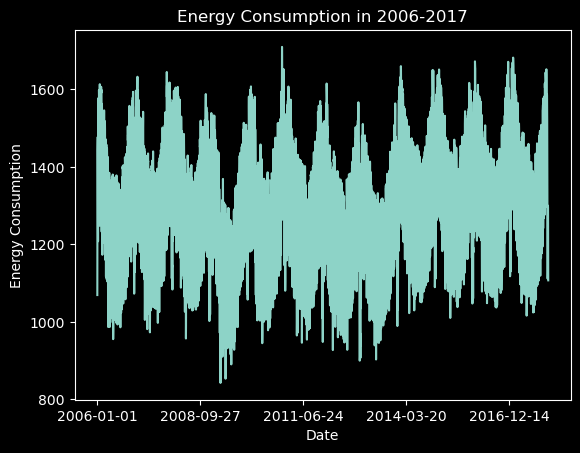

In [48]:
solar_df.Consumption.plot()
plt.title("Energy Consumption in 2006-2017")
plt.ylabel("Energy Consumption")
plt.show()

# Q7
### Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions in the acquire.py file and be able to re-run the functions and get the same data.